# Exercises 4

From now on we will not specify which packages to import. It's up to you to decide/understand what is needed. It's a safe bet to systematically import numpy and matplotlib.pyplot

## Part1
- Find a picture on the web, import it and plot it (usually the link to the image ends with the format of the image *e.g* jpg. Wikipedia is a good source of images)
- Using pwd, figure out what is your current folder
- Using that information, try to list the contents of the folder Data/BBBC007_v1_images/f9620
- The folder contains files denoted D_1 and F_2. Try to parse the folder content to recover only the D_1 files
- Import all those images into a list
- Plot an element of that list

## Part2
- Try to import the image stack in Data/2chZT/2chZT.lsm
- Look at the stack shape. Knowing there are 19 time points, 21 planes and two colors, try to plot the 5th time point, 10th plane of the first color
- Try to interactively plot all time points of that plane

# Solutions 4

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import skimage.io as io

## Part1

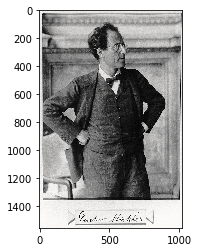

In [15]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Mahler%2C_Gustav%2C_by_Moritz_N%C3%A4hr%2C_BNF_Gallica.jpg/1024px-Mahler%2C_Gustav%2C_by_Moritz_N%C3%A4hr%2C_BNF_Gallica.jpg'
image = io.imread(url)

plt.imshow(image)
plt.show()

In [16]:
import os

In [17]:
pwd

'/Users/gw18g940/Google Drive/BernMIC/ImageProcessingLecture/Python_image_processing/Exercises'

Since the exercise notebooks are in a subfolder, one has to go two levels higher to reach the Data folder. Alternatively, once can specifiy the full path.

In [6]:
filepath = '../../Data/BBBC007_v1_images/f9620'

In [18]:
files = os.listdir(filepath)
files

['20P1_POS0008_F_2UL.tif',
 '20P1_POS0011_F_2UL.tif',
 '20P1_POS0005_F_2UL.tif',
 '20P1_POS0008_D_1UL.tif',
 '20P1_POS0005_D_1UL.tif',
 '20P1_POS0011_D_1UL.tif',
 '20P1_POS0002_D_1UL.tif',
 '20P1_POS0010_F_2UL.tif',
 '20P1_POS0010_D_1UL.tif',
 '20P1_POS0002_F_2UL.tif',
 '20P1_POS0007_F_2UL.tif',
 '20P1_POS0007_D_1UL.tif']

In [19]:
import glob

In [20]:
glob.glob(filepath+'/*_F_2*')

['../../Data/BBBC007_v1_images/f9620/20P1_POS0008_F_2UL.tif',
 '../../Data/BBBC007_v1_images/f9620/20P1_POS0011_F_2UL.tif',
 '../../Data/BBBC007_v1_images/f9620/20P1_POS0005_F_2UL.tif',
 '../../Data/BBBC007_v1_images/f9620/20P1_POS0010_F_2UL.tif',
 '../../Data/BBBC007_v1_images/f9620/20P1_POS0002_F_2UL.tif',
 '../../Data/BBBC007_v1_images/f9620/20P1_POS0007_F_2UL.tif']

In [21]:
import re

In [22]:
matched = [re.findall('.*D\_1.*.tif',x) for x in files]
print(matched)
final_list = [x[0] for x in matched if len(x)>0]
print(final_list)

[[], [], [], ['20P1_POS0008_D_1UL.tif'], ['20P1_POS0005_D_1UL.tif'], ['20P1_POS0011_D_1UL.tif'], ['20P1_POS0002_D_1UL.tif'], [], ['20P1_POS0010_D_1UL.tif'], [], [], ['20P1_POS0007_D_1UL.tif']]
['20P1_POS0008_D_1UL.tif', '20P1_POS0005_D_1UL.tif', '20P1_POS0011_D_1UL.tif', '20P1_POS0002_D_1UL.tif', '20P1_POS0010_D_1UL.tif', '20P1_POS0007_D_1UL.tif']


Or alternatively

In [29]:
import glob

In [24]:
filelist_glob = glob.glob(filepath+'/*D_1*')

In [25]:
filelist_glob

['../../Data/BBBC007_v1_images/f9620/20P1_POS0008_D_1UL.tif',
 '../../Data/BBBC007_v1_images/f9620/20P1_POS0005_D_1UL.tif',
 '../../Data/BBBC007_v1_images/f9620/20P1_POS0011_D_1UL.tif',
 '../../Data/BBBC007_v1_images/f9620/20P1_POS0002_D_1UL.tif',
 '../../Data/BBBC007_v1_images/f9620/20P1_POS0010_D_1UL.tif',
 '../../Data/BBBC007_v1_images/f9620/20P1_POS0007_D_1UL.tif']

In [26]:
image_list = []
for x in filelist_glob:
    temp_im = io.imread(x)
    image_list.append(temp_im)

In [23]:
#creat a list with imported images
image_list = []
for x in final_list:
    temp_im = io.imread(filepath+'/'+x)
    image_list.append(temp_im)

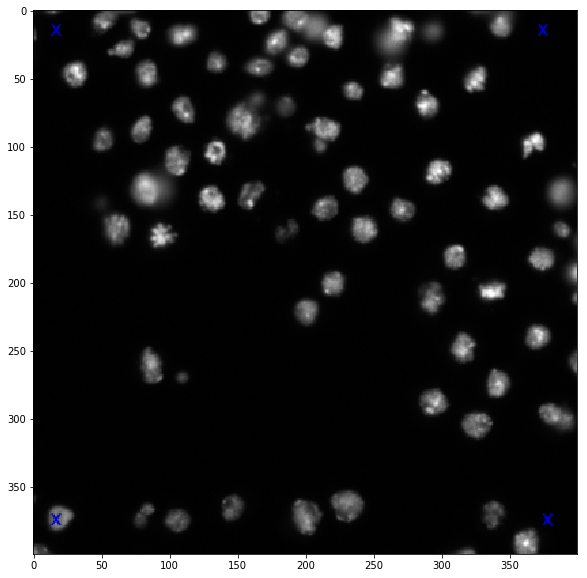

In [27]:
#plot one of the images
plt.figure(figsize=(10,10))
plt.imshow(image_list[4], cmap = 'gray')
plt.show()

## Part2

In [28]:
stack = io.imread('../../Data/2chZT/2chZT.lsm')

OSError: cannot identify image file <_io.BufferedReader name='../../Data/2chZT/2chZT.lsm'>

This didn't work. The function can't understand the file format because it's an LSM file (Zeiss format). Let's try to force it using the tifffile plugin:

In [29]:
stack = io.imread('../../Data//2chZT/2chZT.lsm',plugin='tifffile')

/Users/gw18g940/miniconda3/envs/teaching_test/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2694: UserWarning: empty byte count
  warnings.warn("empty byte count")


In [30]:
stack.shape

(19, 21, 2, 300, 400)

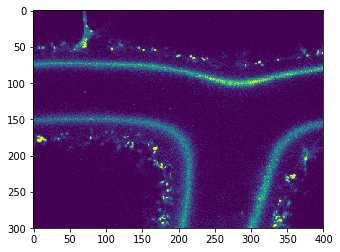

In [31]:
plt.imshow(stack[5,10,0,:,:])
plt.show()

In [32]:
from ipywidgets import interact, IntSlider

In [33]:
def plot_plane(t):
    plt.imshow(stack[t,10,0,:,:])
    plt.show()

In [34]:
max_time = stack.shape[0]-1

In [35]:
interact(plot_plane, t = IntSlider(min=0,max=max_time,step=1,value=0,continuous_update = True))

interactive(children=(IntSlider(value=0, description='t', max=18), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_plane(t)>